## 1. Ca Dynamics question from Introductory Computational Neuroscience course

In the case of the hill, the uniformly changing slope results in a uniformly increasing velocity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

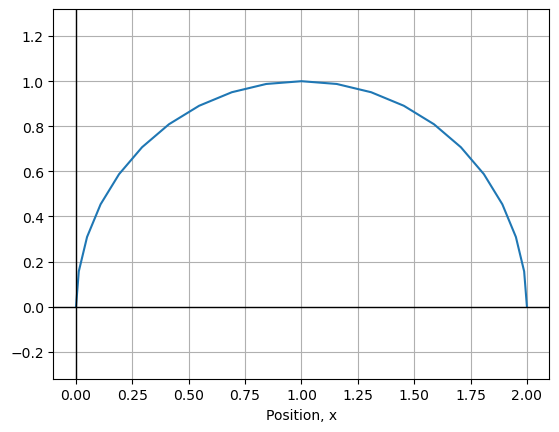

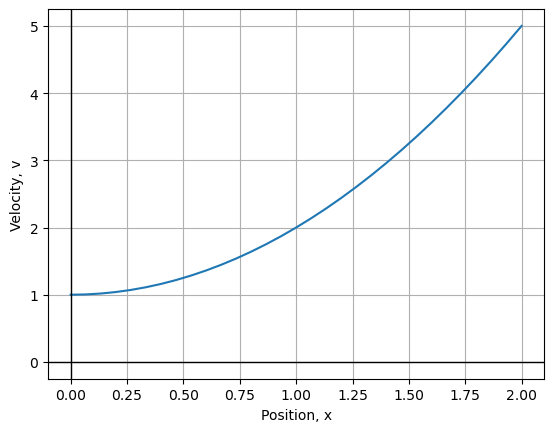

In [31]:
## Graph for hill
theta = np.linspace(0, np.pi, 21)
radius = 1
center = (1, 0)

x_values = center[0] + radius * np.cos(theta)
y_values = center[1] + radius * np.sin(theta)

plt.plot(x_values, y_values)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.grid(True)
plt.axis('equal')
plt.show()


## Graph for velocity using equation 1+x^2
def f(x):
    return 1+x**2

x = np.linspace(0, 2, 31)
y = f(x)
plt.plot(x, y)

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.ylabel('Velocity, v')
plt.grid(True)
plt.show()

Similarly, unchanging slopes would result in linear velocities.

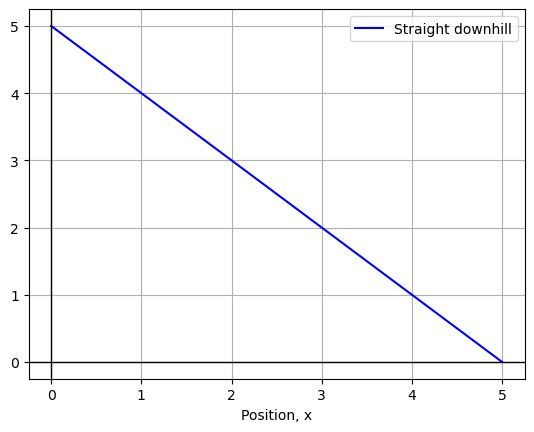

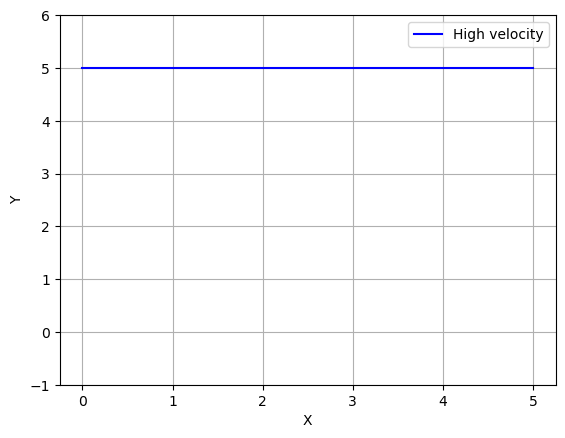

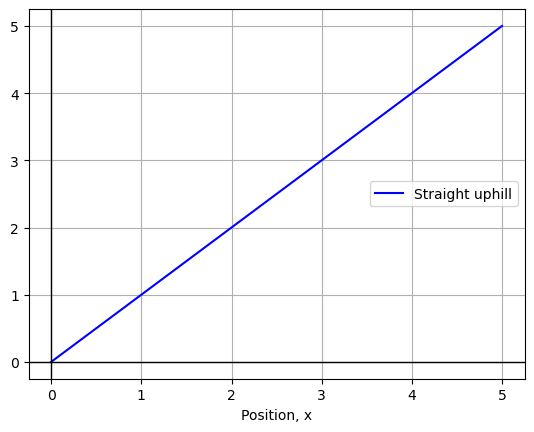

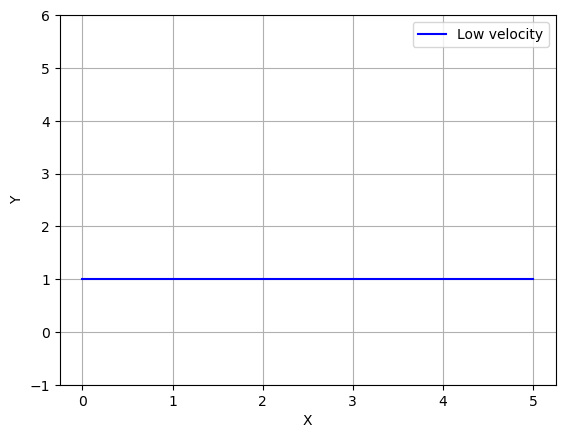

In [33]:


## Graph of straight uphill slope
x_values = [0, 5]
y_values = [5, 0]
plt.plot(x_values, y_values, color='blue', label='Straight downhill')

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.grid(True)
plt.legend()
plt.show()

## Graph of velocity
x_values = [0, 5]
y_values = [5, 5]
plt.plot(x_values, y_values, color='blue', label='High velocity')
plt.ylim(-1, 6)

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

## Graph of straight downhill slope
x_values = [0, 5]
y_values = [0, 5]
plt.plot(x_values, y_values, color='blue', label='Straight uphill')

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.grid(True)
plt.legend()
plt.show()

## Graph of velocity
x_values = [0, 5]
y_values = [1, 1]
plt.plot(x_values, y_values, color='blue', label='Low velocity')
plt.ylim(-1, 6)

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()



Given that intracellular Ca++ concentration dynamics in brain cells are not uniform profile like the hill,
the resulting velocity changes will not be uniformly incremental velocity. However, I don’t know about
the actual Ca dynamics in the brain.

In example 4, a temperature equilibrium is reached as the heat extraction by AC from inside the house is equal to the heat leakage inside of the house from the outer environment. The rate of change of temperature is:

where K is the heat capacity,  is the minute change in temperature as time approaches 0, A is the rate of heat extraction by the AC, T_ext is the outside temperature, T is the inside temperature, and B is the leakiness of the house.
In the case of Ca, the concentration is much higher outside the cell. After the action potential is reached, the voltage-gated Ca channels open, and Ca comes inside the cell by facilitated diffusion to reach an equilibrium.
But the Ca gradient is required for further action potential, and it is restored later with active transport. To me, this process is comparable to maintaining a temperature gradient by the AC. Ac extracts heat from inside the house and releases it outside. But as heat leaks inside the house, the AC needs to run continuously to maintain the equilibrium.
Assuming no Ca can leak inside the cell through the membrane, after an equilibrium is reached, it should be maintained without continuous active transport. Similarly, if the house was completely insulated, the temperature change would’ve been:

until the desired temperature is reached. After that, the AC could shut down.

## Ca data

### Analysis

In [55]:
import pandas as pd
import os

cnl_directory = '/home/sunzid/Research/24_Cellular Neuroscience Lab'
os.chdir(cnl_directory)

#############################################################

## Reading
# ca1
ca1_path = 'Ca_data/0001-C5 (-F) edit 2020-12-30-01a -DeID- Copy.xlsx'
ca1_start_row = 107
ca1_end_row = 317
ca1_num_rows = ca1_end_row - ca1_start_row
ca1_column_range = 'A:CC'

ca1 = pd.read_excel(ca1_path, skiprows=ca1_start_row, nrows= ca1_num_rows, usecols=ca1_column_range, index_col=0)


# ca2
ca2_path = 'Ca_data/0002-C3 (+F)-edit 2021-01-15-01b - De-ID.xlsx'
ca2_start_row = 103
ca2_end_row = 314
ca2_num_rows = ca1_end_row - ca1_start_row
ca2_column_range = 'A:BY'

ca2 = pd.read_excel(ca2_path, skiprows=ca2_start_row, nrows= ca2_num_rows, usecols=ca2_column_range, index_col=0)

#############################################################

## Normalization
# ca1
ca1_normalized = pd.DataFrame([])
for column in ca1.columns[1:]:
    ca1_normalized[column] = ca1[column] / ca1[column].iloc[0]

# ca2
ca2_normalized = pd.DataFrame([])
for column in ca2.columns[1:]:
    ca2_normalized[column] = ca2[column] / ca2[column].iloc[0]

#############################################################

## percent change
# ca1
ca1_pct_change = ca1.pct_change()

# ca2
ca2_pct_change = ca2.pct_change()


In [108]:
import matplotlib.pyplot as plt

#############################################################

def smooth(dataframe, window = 1):
    return dataframe.rolling(window).mean()

#############################################################

def plot_data(data, window, title):
    plt.figure(figsize=(12, 6))
    
    data = smooth(data, window)
    
    for column in data.columns[1:]:
        plt.plot(data.index, data[column], label=column)

    plt.xlabel('Time')
    plt.ylabel('Ca')
    
    plt.title(title + ' with rolling window = ' + str(window))
    plt.show()

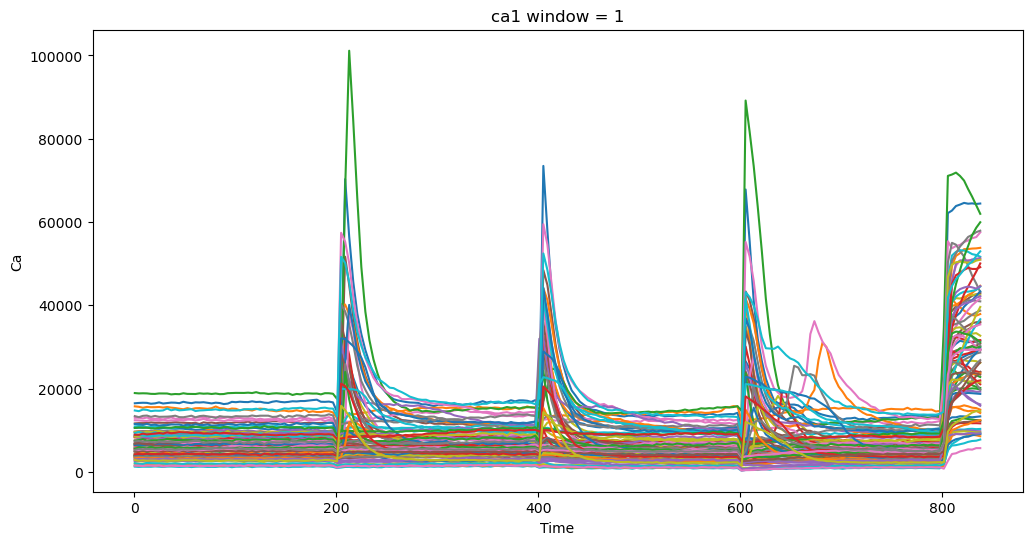

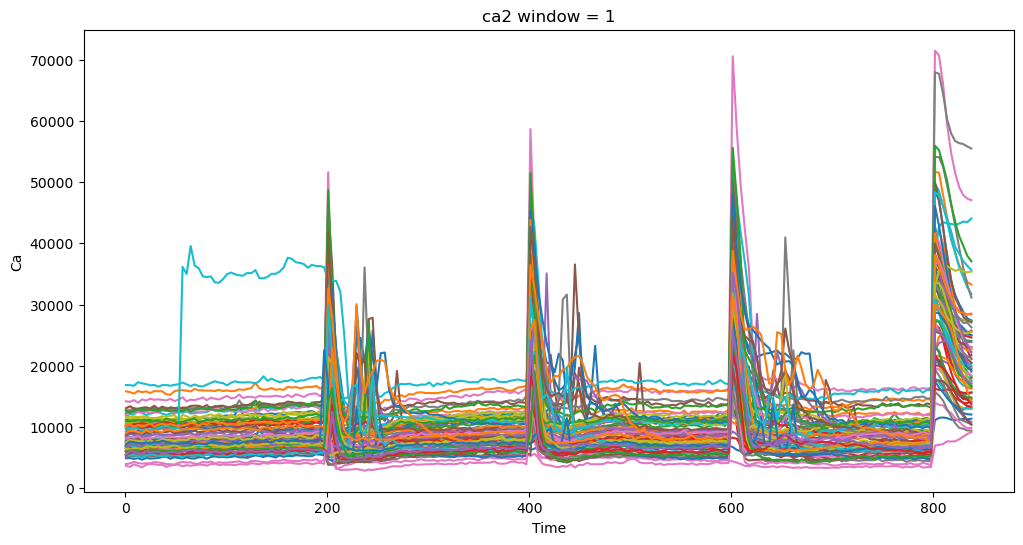

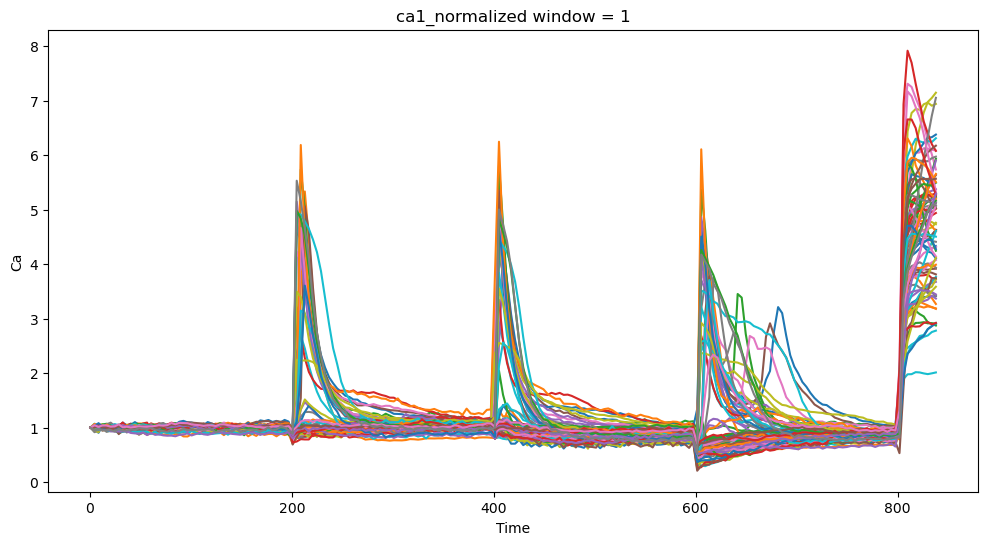

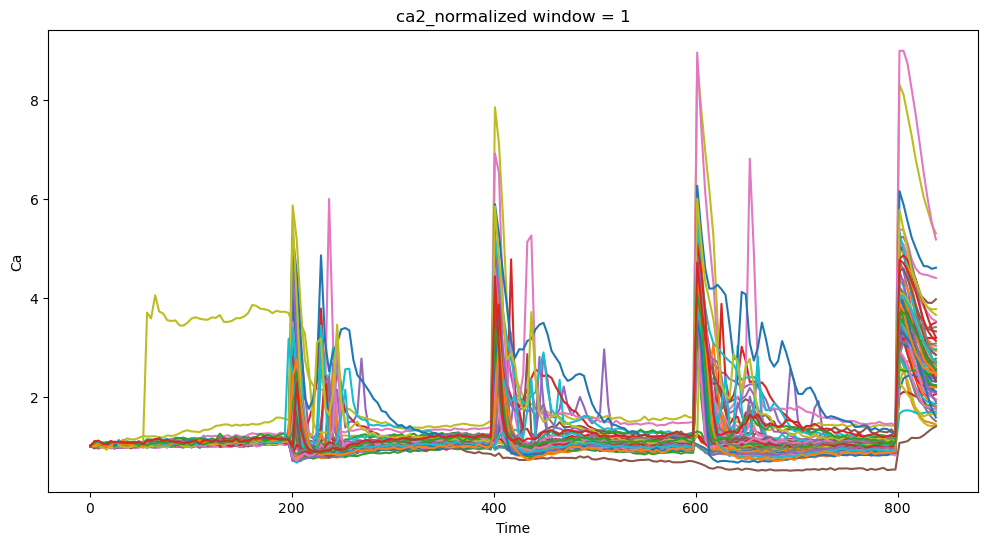

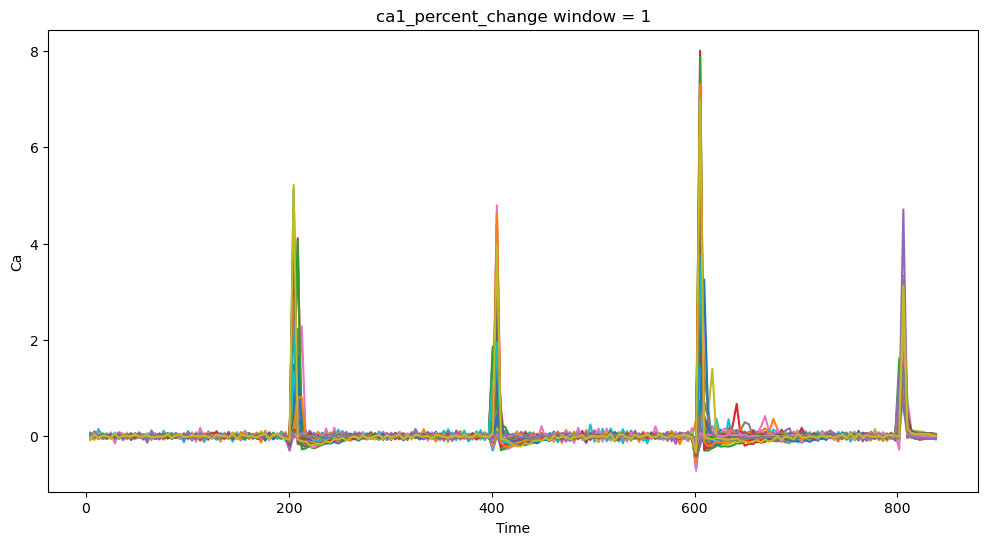

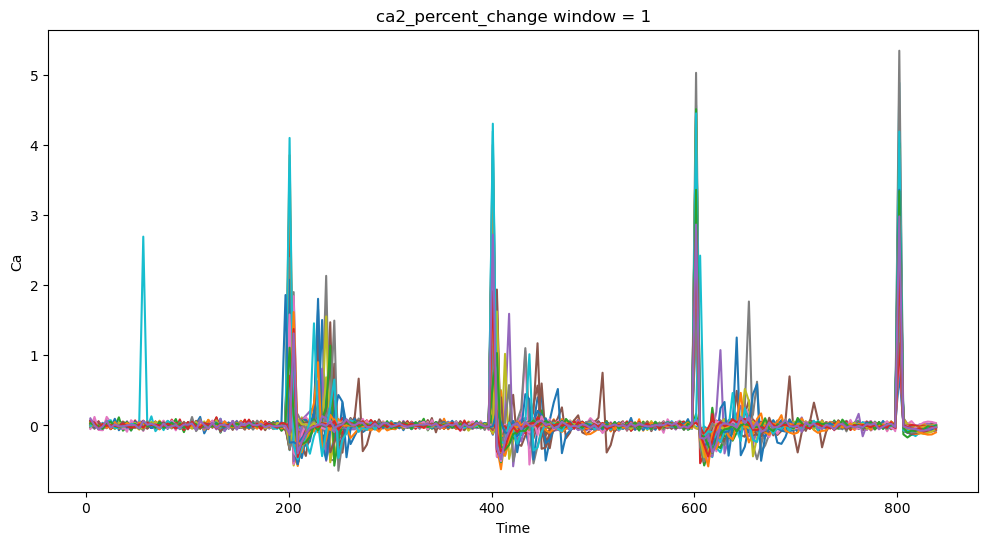

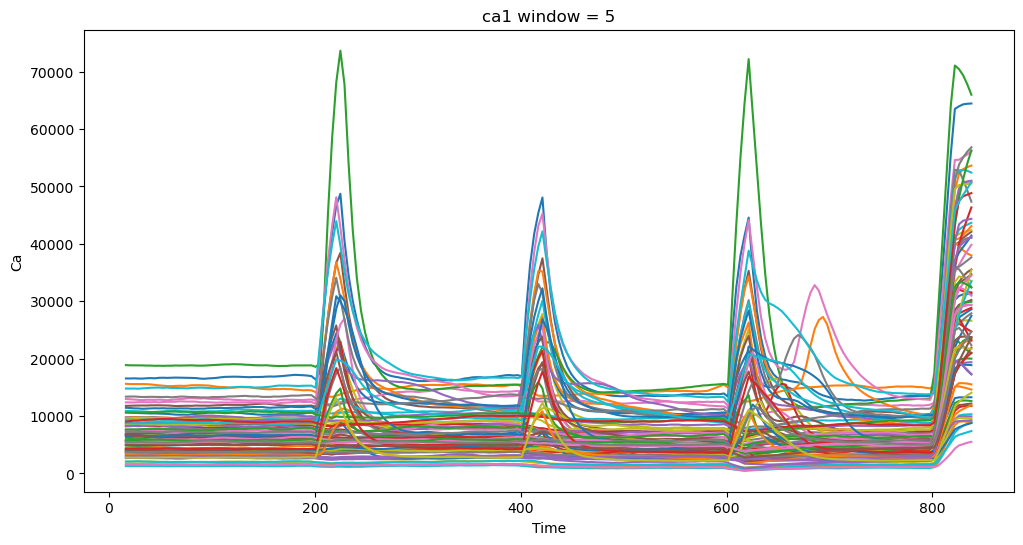

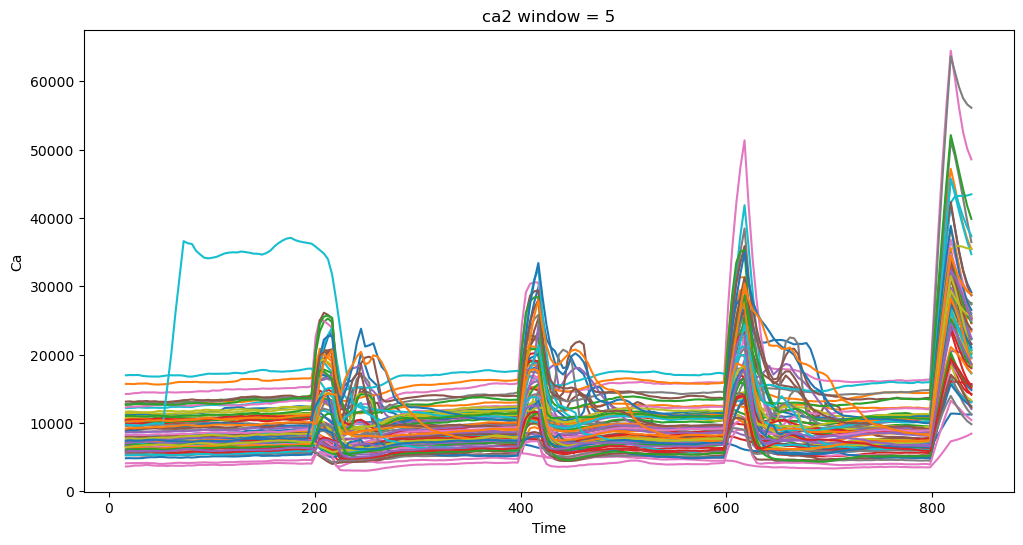

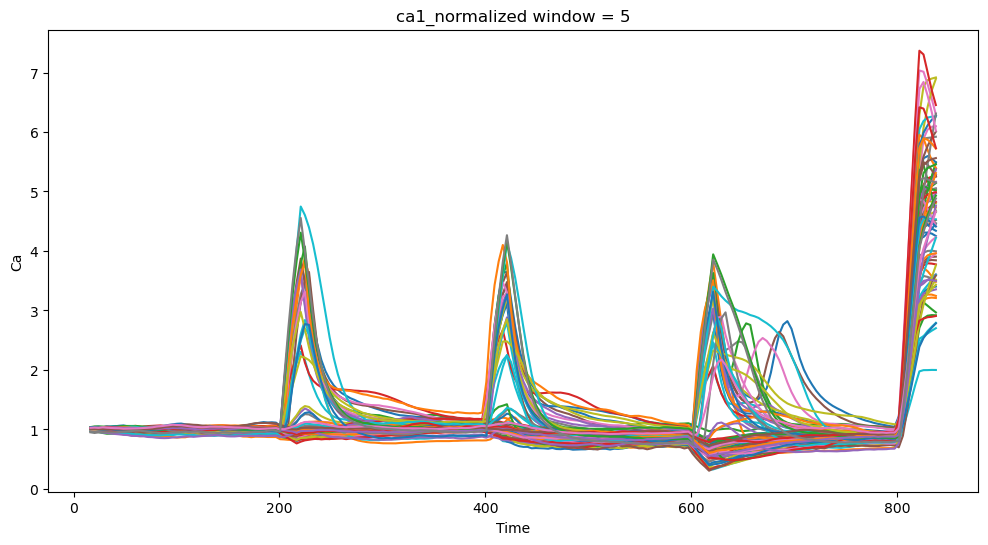

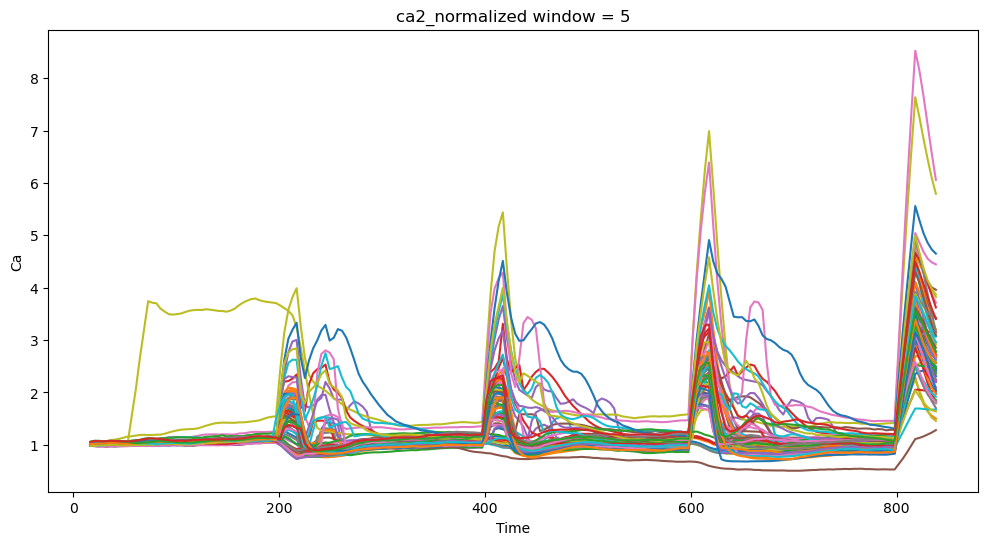

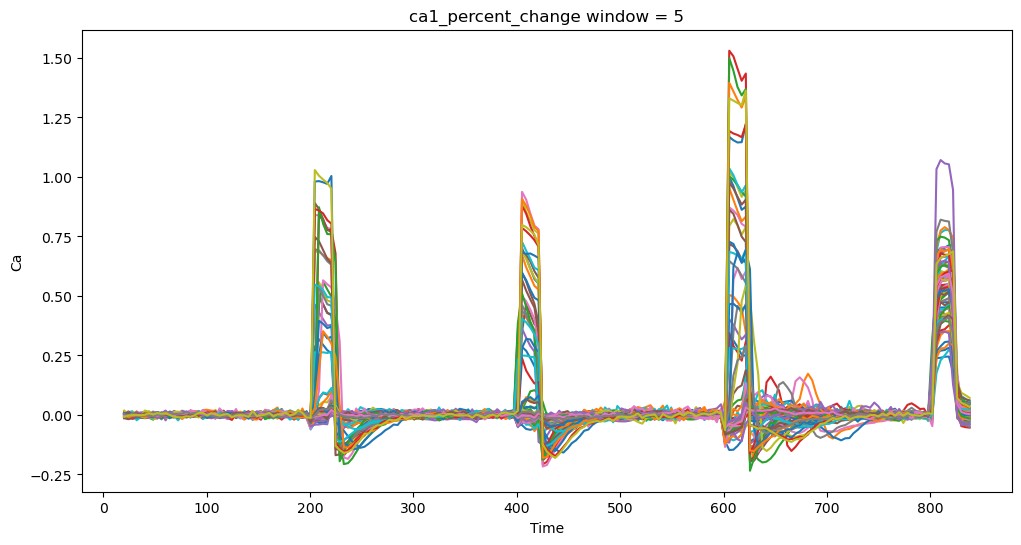

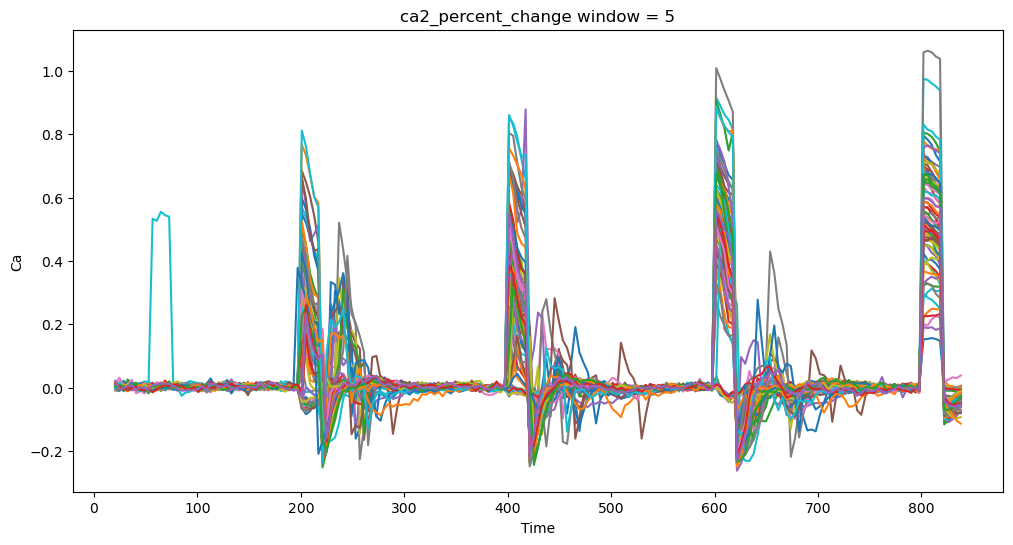

In [103]:
import matplotlib.pyplot as plt

## Plotting normalized data
rolling_window = 1

## Plotting actual data
# ca1
plot_data(ca1, rolling_window, 'ca1')
# Ca2
plot_data(ca2, rolling_window, 'ca2')

## Plotting normalized data
# ca1
plot_data(ca1_normalized, rolling_window, 'ca1_normalized')
# Ca2
plot_data(ca2_normalized, rolling_window, 'ca2_normalized')

## Plotting percent change
# ca1
plot_data(ca1_pct_change, rolling_window, 'ca1_percent_change')
# Ca2
plot_data(ca2_pct_change, rolling_window, 'ca2_percent_change')


#############################################################


### Smoothing over multiple rows
rolling_window = 5

## Plotting actual data
# ca1
plot_data(ca1, rolling_window, 'ca1')
# Ca2
plot_data(ca2, rolling_window, 'ca2')

## Plotting normalized data
# ca1
plot_data(ca1_normalized, rolling_window, 'ca1_normalized')
# Ca2
plot_data(ca2_normalized, rolling_window, 'ca2_normalized')

## Plotting percent change
# ca1
plot_data(ca1_pct_change, rolling_window, 'ca1_percent_change')
# Ca2
plot_data(ca2_pct_change, rolling_window, 'ca2_percent_change')


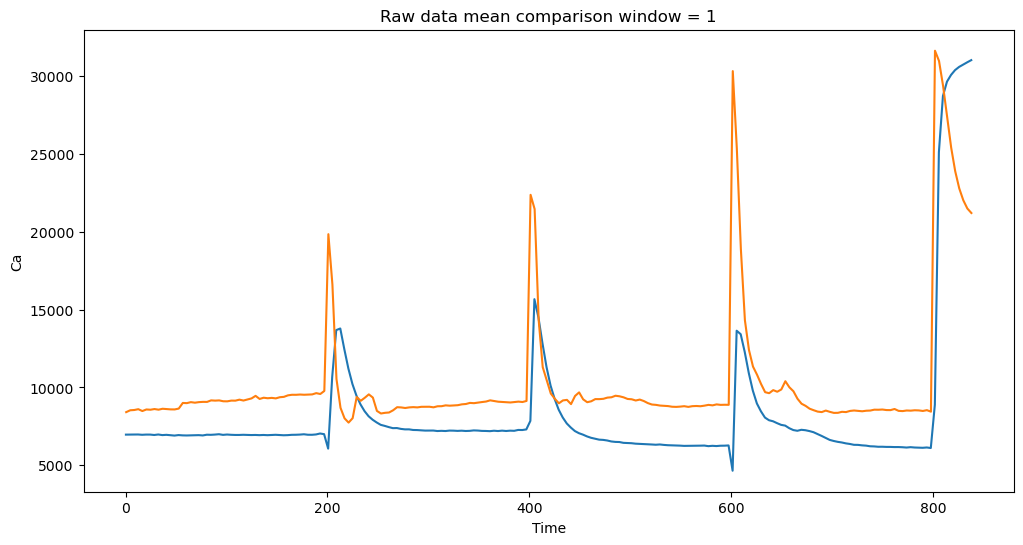

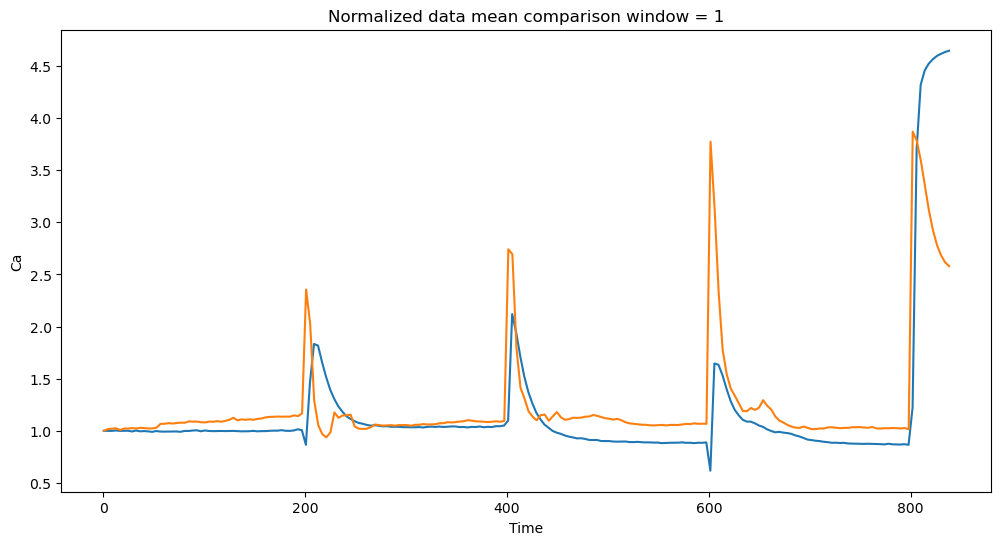

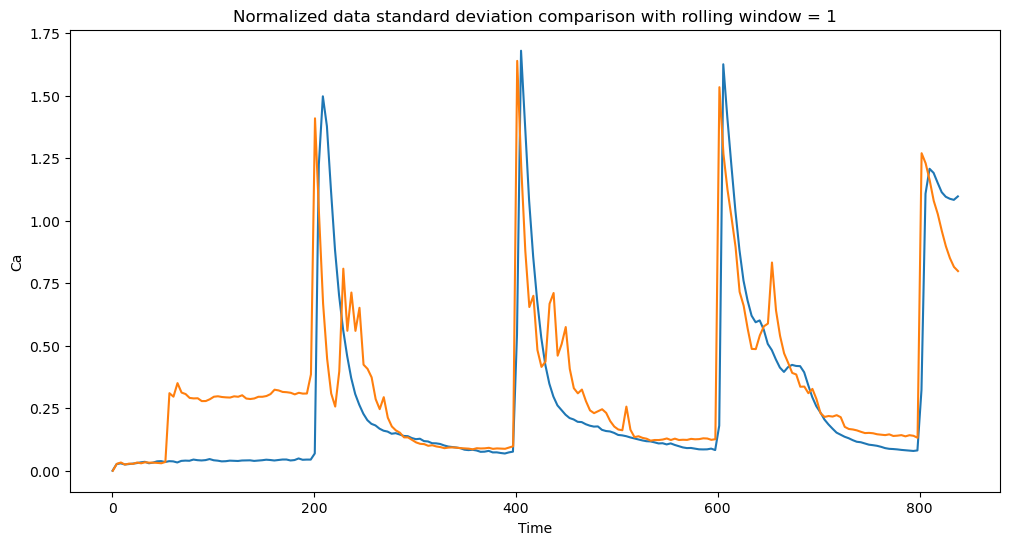

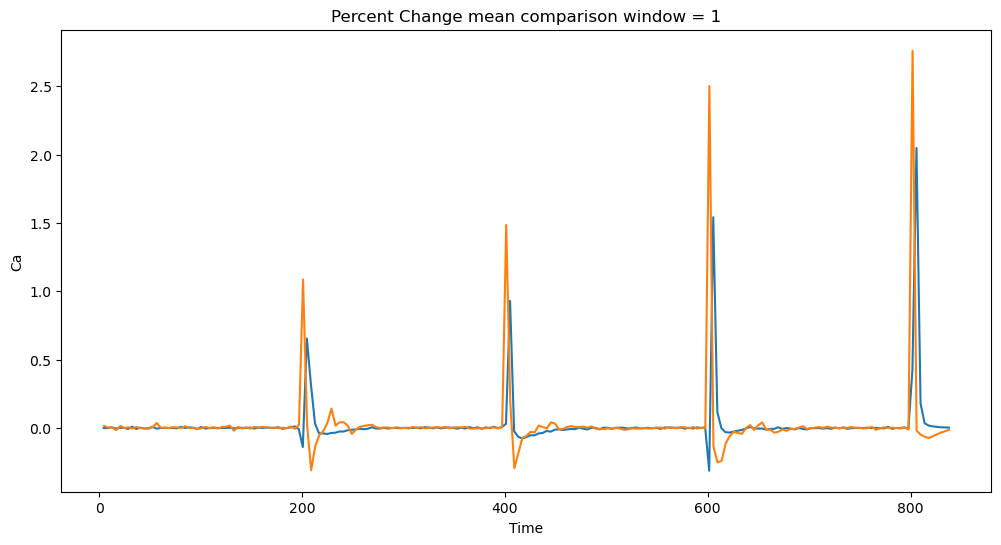

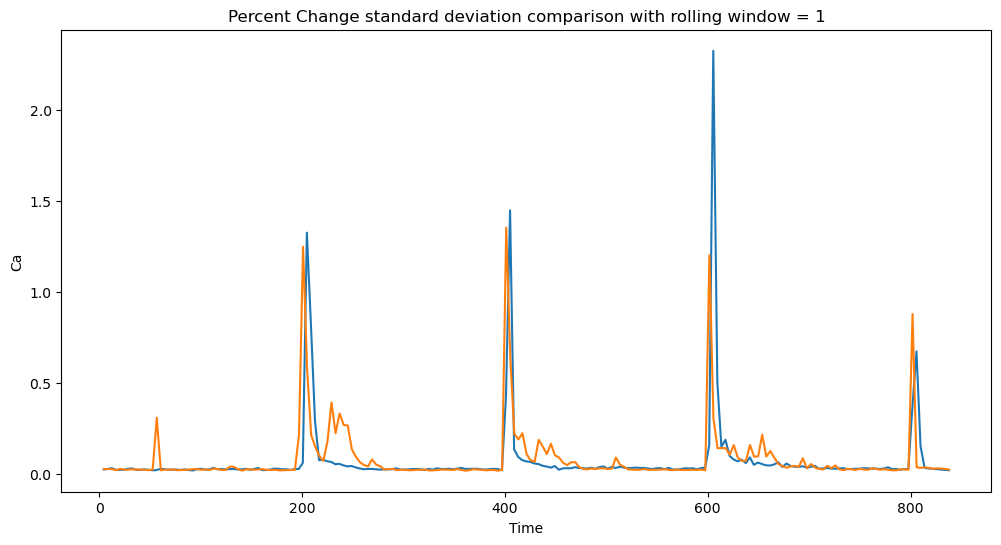

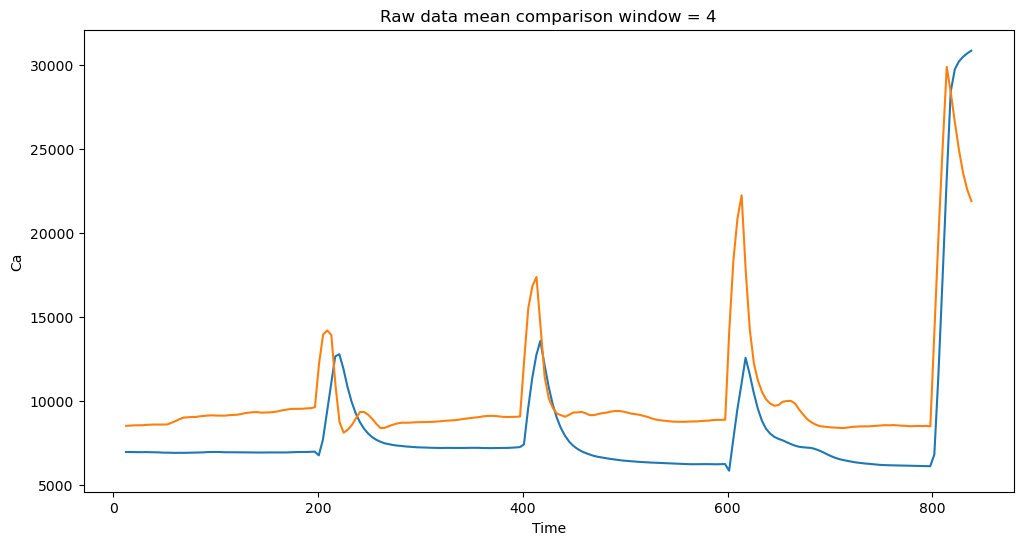

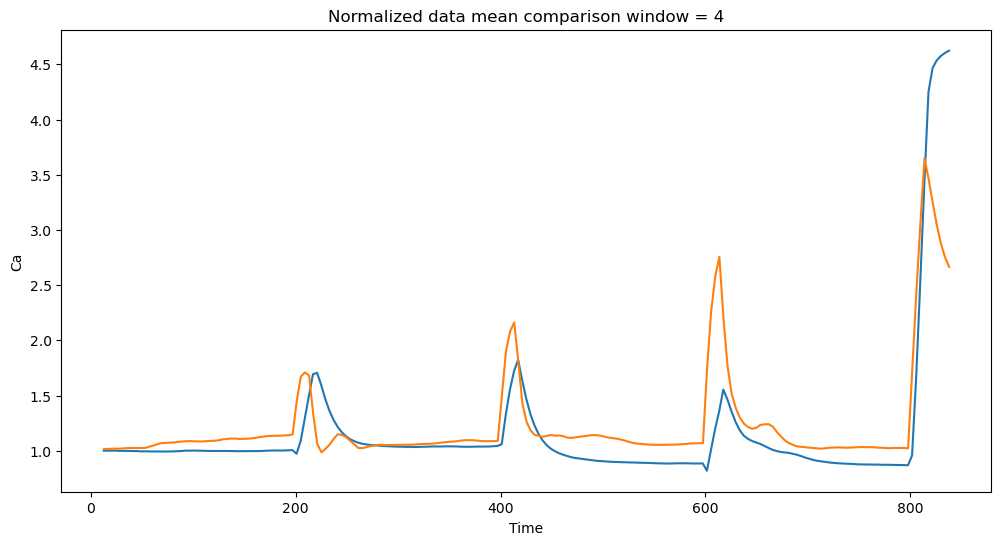

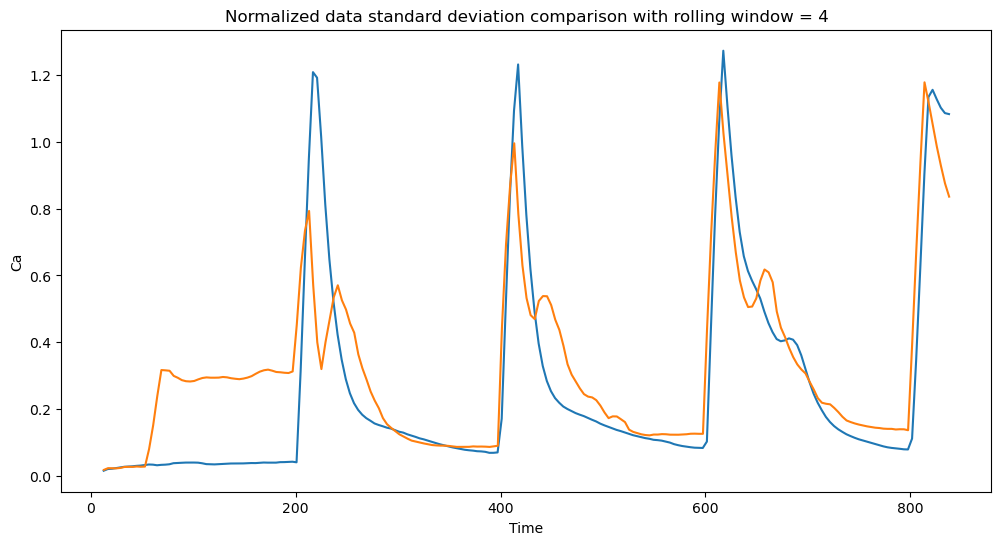

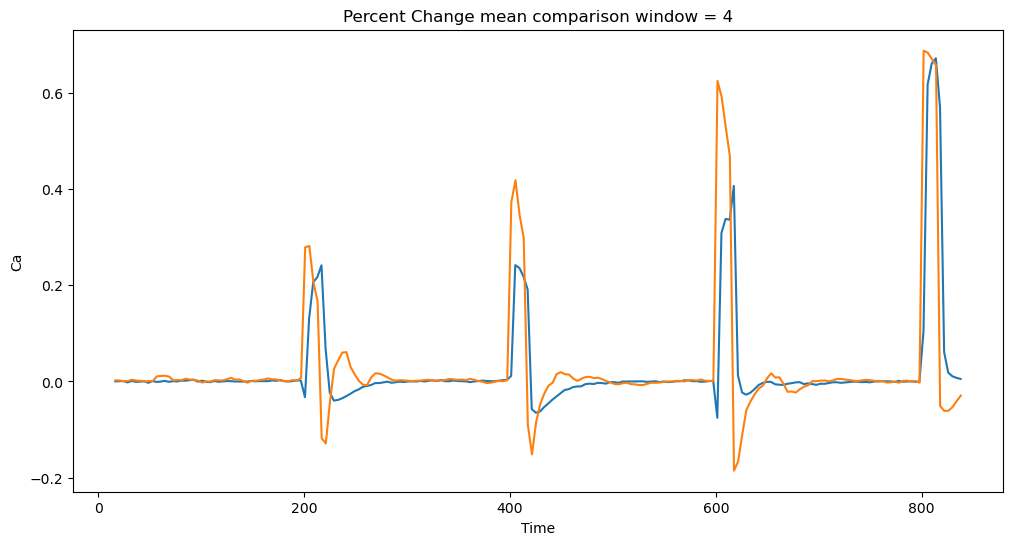

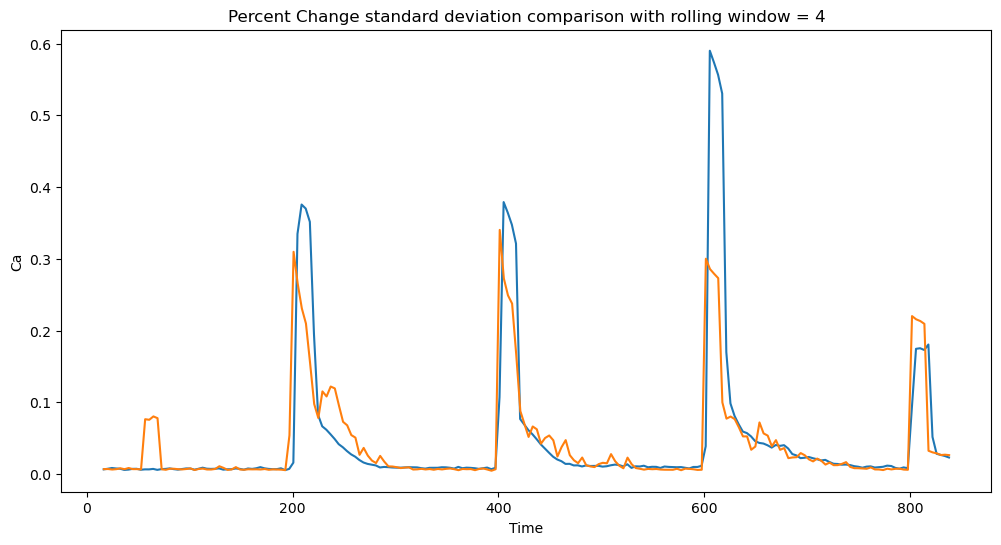

In [109]:
def plot_mean(data1, data2, title, rolling_window = 1):
    
    data1 = smooth(data1, rolling_window)
    data2 = smooth(data2, rolling_window)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data1.index, data1.mean(axis=1), label=column)
    plt.plot(data2.index, data2.mean(axis=1), label=column)
    plt.xlabel('Time')
    plt.ylabel('Ca')
    plt.title(title + ' mean comparison window = '+ str(rolling_window))
    plt.show()
    
def plot_std_dev(data1, data2, title, rolling_window = 1):
    
    data1 = smooth(data1, rolling_window)
    data2 = smooth(data2, rolling_window)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data1.index, data1.std(axis=1), label=column)
    plt.plot(data2.index, data2.std(axis=1), label=column)
    plt.xlabel('Time')
    plt.ylabel('Ca')
    plt.title(title + ' standard deviation comparison with rolling window = '+ str(rolling_window))
    plt.show()
#############################################################
### Plotting each row
rolling_window = 1

# Plotting mean
plot_mean(ca1, ca2, 'Raw data', rolling_window)

# Plotting mean of normalized data
plot_mean(ca1_normalized, ca2_normalized, 'Normalized data', rolling_window)

# Plotting standard deviation of normalized data
plot_std_dev(ca1_normalized, ca2_normalized, 'Normalized data', rolling_window)

# Plotting mean of percent change
plot_mean(ca1_pct_change, ca2_pct_change, 'Percent Change', rolling_window)

# Plotting standard deviation of percent change data
plot_std_dev(ca1_pct_change, ca2_pct_change, 'Percent Change', rolling_window)

#############################################################
### Smoothing over multiple rows
rolling_window = 4

# Plotting mean
plot_mean(ca1, ca2, 'Raw data', rolling_window)

# Plotting mean of normalized data
plot_mean(ca1_normalized, ca2_normalized, 'Normalized data', rolling_window)

# Plotting standard deviation of normalized data
plot_std_dev(ca1_normalized, ca2_normalized, 'Normalized data', rolling_window)

# Plotting mean of percent change
plot_mean(ca1_pct_change, ca2_pct_change, 'Percent Change', rolling_window)

# Plotting standard deviation of percent change data
plot_std_dev(ca1_pct_change, ca2_pct_change, 'Percent Change', rolling_window)



### Questions:

It wasn't mentioned what the 80 objects were. There were variation in Ca data among objects within the same dataset. Without details of the objects, the possible reason for this difference was unclear.

There were similar differences of the four upslope-downslop cycles of the two datasets. Without the details of of the 3 Glutamate dosage, it wasn't clear if the difference in these four cycles was due to changing dosage of Glutamate, or change in response against similar dosage of Glutamate.

1. How do the data in (-F) and (+F) conditions differ?
2. Which one seems to have more negative feedback?
3. Is there any difference in positive feedback in the data sets?
4. Building on the previous assignment, is the rate of change for the different peaks the same for upslope and down slope?